In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppression des messages warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('credit_immobilier_ISF.csv')

## Analyse des données

Exploration du jeu de données

In [4]:
df.shape

(1021, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compte_courant            1021 non-null   object 
 1   duree_emprunt_mois        1021 non-null   int64  
 2   historique_credit         1021 non-null   object 
 3   raison                    1021 non-null   object 
 4   montant                   1021 non-null   int64  
 5   compte_epargne            1020 non-null   object 
 6   duree_emploi              1021 non-null   object 
 7   annees_presence_logement  1018 non-null   float64
 8   age                       1020 non-null   float64
 9   autre_credit              1021 non-null   object 
 10  logement                  1021 non-null   object 
 11  nbre_emprunts_actuels     1021 non-null   int64  
 12  job                       1018 non-null   object 
 13  dependants                1021 non-null   object 
 14  telephon

In [6]:
df.head()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
0,< 0 Euro,6,critique,ameublement,1169,inconnu,> 7 annees,4.0,67.0,aucun,proprietaire,2,qualifie,1,oui,non,8135.110140
1,1 - 200 Euro,48,bon,ameublement,5951,< 100 Euro,1 - 4 annees,2.0,22.0,aucun,proprietaire,1,qualifie,1,oui,oui,19334.307686
2,inconnu,12,critique,education,2096,< 100 Euro,4 - 7 annees,3.0,49.0,aucun,proprietaire,1,non_qualifie,2,oui,non,4864.954258
3,< 0 Euro,42,bon,ameublement,7882,< 100 Euro,4 - 7 annees,4.0,45.0,aucun,autre,1,qualifie,2,oui,non,22152.947349
4,< 0 Euro,24,pauvre,auto,4870,< 100 Euro,1 - 4 annees,4.0,53.0,aucun,autre,2,qualifie,2,oui,oui,23900.704144


Variables numériques : 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duree_emprunt_mois,1021.0,20.770813,12.050318,4.000000,12.000000,18.000000,24.000000,72.000000
montant,1021.0,3250.088149,2830.788792,250.000000,1352.000000,2299.000000,3966.000000,18424.000000
annees_presence_logement,1018.0,2.844794,1.104864,1.000000,2.000000,3.000000,4.000000,4.000000
age,1020.0,35.491176,11.395078,19.000000,27.000000,33.000000,42.000000,75.000000
nbre_emprunts_actuels,1021.0,1.409403,0.576390,1.000000,1.000000,1.000000,2.000000,4.000000
revenufinal,1021.0,12273.073874,11200.509536,734.476054,5192.478646,8615.582896,15559.590686,79354.527366


Variables catégorielles

In [8]:
df.describe(include='object')

,compte_courant,historique_credit,raison,compte_epargne,duree_emploi,autre_credit,logement,job,dependants,telephone,defaillant
count,1021,1021,1021,1020,1021,1021,1021,1018,1021,1021,1020
unique,4,5,6,5,6,4,4,5,3,1,2
top,inconnu,bon,ameublement,< 100 Euro,1 - 4 annees,aucun,proprietaire,qualifie,1,oui,non
freq,402,535,486,611,349,834,731,648,864,1021,717


In [9]:
echantillonColonnes = []
for i in df.columns:
    listcolumn = str(list(df[i].head(5)))
    echantillonColonnes.append(listcolumn)

In [10]:
#data frame colonnes rassemblant les données précédentes pour vérification si anomalies flagrantes
d = {'colonne': list(df.columns), 'type': list(df.dtypes), 'Echantillon':echantillonColonnes}
colonnesTypes = pd.DataFrame(data=d)

pd.options.display.max_rows = 24
colonnesTypes

,colonne,type,Echantillon
0,compte_courant,object,"['< 0 Euro', '1 - 200 Euro', 'inconnu', '< 0 E..."
1,duree_emprunt_mois,int64,"[6, 48, 12, 42, 24]"
2,historique_credit,object,"['critique', 'bon', 'critique', 'bon', 'pauvre']"
3,raison,object,"['ameublement', 'ameublement', 'education', 'a..."
4,montant,int64,"[1169, 5951, 2096, 7882, 4870]"
5,compte_epargne,object,"['inconnu', '< 100 Euro', '< 100 Euro', '< 100..."
6,duree_emploi,object,"['> 7 annees', '1 - 4 annees', '4 - 7 annees',..."
7,annees_presence_logement,float64,"[4.0, 2.0, 3.0, 4.0, 4.0]"
8,age,float64,"[67.0, 22.0, 49.0, 45.0, 53.0]"
9,autre_credit,object,"['aucun', 'aucun', 'aucun', 'aucun', 'aucun']"


In [11]:
categorical = ["compte_courant", "historique_credit","raison","compte_epargne","duree_emploi","autre_credit","logement","job","dependants","telephone","defaillant"]
numerical = ["duree_emprunt_mois", "annees_presence_logement", "age", "nbre_emprunts_actuels", "revenufinal"]

### Séparation variables explicatives/à expliquer

In [12]:
y = df["montant"]
X = df.loc[:, df.columns != 'montant']

### Traitement des données manquantes

Identification des valeurs manquantes par colonne :

In [13]:
X.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
compte_epargne              1
duree_emploi                0
annees_presence_logement    3
age                         1
autre_credit                0
logement                    0
nbre_emprunts_actuels       0
job                         3
dependants                  0
telephone                   0
defaillant                  1
revenufinal                 0
dtype: int64

In [14]:
y.isnull().sum()

0

Etude des variables explicatives contenant des valeurs manquantes :

In [15]:
print(X["job"].unique())
print(X["annees_presence_logement"].unique())
print(X["defaillant"].unique())
print(X["compte_epargne"].unique())
print(X["age"].unique())

['qualifie' 'non_qualifie' 'management' 'oui' 'chomeur' nan]
[ 4.  2.  3.  1. nan]
['non' 'oui' nan]
['inconnu' '< 100 Euro' '500 - 1000 Euro' '> 1000 Euro' '100 - 500 Euro'
 nan]
[67. 22. 49. 45. 53. 35. 61. 28. 25. 24. 60. 32. 44. 31. 48. 26. 36. 39.
 42. 34. nan 27. 30. 57. 33. 37. 58. 23. 29. 52. 50. 46. 51. 41. 40. 66.
 47. 56. 54. 20. 63. 21. 38. 70. 65. 74. 68. 43. 55. 64. 75. 19. 62. 59.]


Pour commencer nous remarquons que des valeurs manquantes/valeurs mal définies se cachent derrière certaines modalités (comme par exemple la modalité "oui" de la variable job) :

In [16]:
X["job"] = X["job"].replace('oui',np.NaN)
X["compte_epargne"] = X["compte_epargne"].replace(np.NaN,"inconnu")

Rergardons si il en est de même pour les autres variables explicatives qualitatives : 

In [17]:
print(X["compte_courant"].unique())
print(X["historique_credit"].unique())
print(X["raison"].unique())
print(X["duree_emploi"].unique())
print(X["autre_credit"].unique())
print(X["logement"].unique())
print(X["dependants"].unique())
print(X["telephone"].unique())

['< 0 Euro' '1 - 200 Euro' 'inconnu' '> 200 Euro']
['critique' 'bon' 'pauvre' 'parfait' 'tres bon']
['ameublement' 'education' 'auto' 'business' 'renonvations' 'auto0']
['> 7 annees' '1 - 4 annees' '4 - 7 annees' 'chomeur' '< 1 annee'
 '> 7 annes']
['aucun' 'banque' '2' 'magasin']
['proprietaire' 'autre' 'locataire' 'qualifie']
['1' '2' 'oui']
['oui']


C'est effectivement le cas, nous allons donc appliquer un retraitement en conséquence :

In [18]:
X["raison"] = X["raison"].replace("auto0","auto")
X["duree_emploi"] = X["duree_emploi"].replace('> 7 annes','> 7 annees')
X["autre_credit"] = X["autre_credit"].replace("2",np.NaN)
X["logement"] = X["logement"].replace('qualifie',np.NaN)
X["dependants"] = X["dependants"].replace("oui",np.NaN)

De plus la variable "telephone" prend toujours la valeur 1. Elle est donc inutile dans le cadre d'une future modélisation. Suivant cela, nous allons la retirer de X.

In [19]:
X = X.drop(["telephone"], axis=1)
categorical = ["compte_courant", "historique_credit","raison","compte_epargne","duree_emploi","autre_credit","logement","job","dependants","defaillant"]

Etude des lignes contenant des valeurs manquantes :

In [20]:
mask = False
for col in X.columns : mask = mask | X[col].isnull()
dfnulls = X[mask]

dfnulls 

,compte_courant,duree_emprunt_mois,historique_credit,raison,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,defaillant,revenufinal
29,inconnu,7,critique,ameublement,< 100 Euro,> 7 annees,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,6584.168778
413,inconnu,15,bon,auto,500 - 1000 Euro,> 7 annees,NaN,31.0,aucun,proprietaire,2,qualifie,2,non,6493.120171
709,1 - 200 Euro,18,pauvre,auto,< 100 Euro,> 7 annees,NaN,42.0,aucun,autre,1,qualifie,1,oui,31068.029379
826,1 - 200 Euro,8,bon,business,< 100 Euro,< 1 annee,2.0,26.0,aucun,proprietaire,1,NaN,1,non,3070.511597
853,inconnu,4,bon,ameublement,< 100 Euro,< 1 annee,3.0,23.0,aucun,locataire,1,NaN,2,non,1056.317863
858,inconnu,18,bon,renonvations,< 100 Euro,< 1 annee,4.0,23.0,aucun,proprietaire,1,NaN,1,oui,9862.654808


In [21]:
# dans df_na uniquement les variables pour lesquelles il y a des valeurs manquantes 
df_na = (X.isnull().sum() / len(X))
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_df = pd.DataFrame({'Ratio valeurs manquantes' : df_na})
missing_df

,Ratio valeurs manquantes
job,0.003918
annees_presence_logement,0.002938
defaillant,0.000979
dependants,0.000979
logement,0.000979
autre_credit,0.000979
age,0.000979


In [22]:
X.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
compte_epargne              0
duree_emploi                0
annees_presence_logement    3
age                         1
autre_credit                1
logement                    1
nbre_emprunts_actuels       0
job                         4
dependants                  1
defaillant                  1
revenufinal                 0
dtype: int64

Il y a donc très peu de valeurs manquantes. Nous allons appliquer un retraitement de ces dernières adapté à ce que nous venons d'observer.

### Traitement des données manquantes au sein des variables explicatives :

Concernant la donnée manquante de la variable age, au vu du nombre de variables explicatives et d'observations à disposition, nous avons suffisament d'information pour estimer sa valeur en fonction des individus lui "ressemblant le plus". Pour cela nous utiliserons une méthode des k-Plus proches voisins. 

Pour information, nous préférons ici cette option à celle qui consiste à remplacer cette valeur par la moyenne (ou mediane) de la colonne age puisqu'elle semble plus adaptée et pertinente dans ce cas de figure précis.

Nous allons également appliquer cette méthode aux valeurs manquantes des variables "logement", "job", "dependants" et "defaillant".

In [23]:
from sklearn.impute import KNNImputer

# Nous considérerons les 10 PPV afin d'avoir un "échantillon représentatif de profils similaires"

imputer = KNNImputer(n_neighbors=10)

#Nous allons temporairement associer des entiers distincts aux modalités des variables qualitatives afin de permettre
#l'entrainement du modèle des k-PPV (k=10 ici)

df_temp = X.copy()   #On utilise .copy() pour éviter que les changments appliqués à df_temp ne se répercutent sur X.
df_temp[categorical] = df_temp[categorical].astype('category')
df_temp[categorical] = df_temp[categorical].apply(lambda x: x.cat.codes)

Afin que l'algorithme des k-PPV puisse correctement identifier les valeurs manquantes il nous faut appliquer une dernière transformation : 

In [24]:
df_temp["job"] = df_temp["job"].replace(-1,np.NaN)
df_temp["logement"] = df_temp["logement"].replace(-1,np.NaN)
df_temp["dependants"] = df_temp["dependants"].replace(-1,np.NaN)
df_temp["defaillant"] = df_temp["defaillant"].replace(-1,np.NaN)   
df_temp["autre_credit"] = df_temp["autre_credit"].replace(-1,np.NaN)    

In [25]:
imputed = imputer.fit_transform(df_temp)
df_imputed = pd.DataFrame(imputed, columns=df_temp.columns)

####

print("Nous allons donc remplacer l'âge du 29ème individu initialement ",X.loc[29,"age"] ," par ", round(df_imputed.loc[29,"age"]))

####

print("Nous allons donc remplacer le métier du 29ème individu initialement ",X.loc[29,"job"] ," par ", df_imputed.loc[29,"job"], "c'est à dire par la modalité qualifie")
print("Nous allons remplacer le métier du 826ème individu initialement ",X.loc[826,"job"] ," par ", df_imputed.loc[826,"job"], "c'est à dire par la modalité non_qualifie")
print("Nous allons remplacer le métier du 853ème individu initialement ",X.loc[853,"job"] ," par ", df_imputed.loc[853,"job"], "c'est à dire par la modalité non_qualifie")
print("Nous allons remplacer le métier du 858ème individu initialement ",X.loc[858,"job"] ," par ", df_imputed.loc[858,"job"], "c'est à dire par la modalité non_qualifie")

####

print("Nous allons donc remplacer la situation immobilière du 29ème individu initialement ",X.loc[29,"logement"] ," par ", df_imputed.loc[29,"logement"], "c'est à dire par la modalité proprietaire")

####

print("Nous allons donc remplacer la dependance du 29ème individu initialement ",X.loc[29,"dependants"] ," par ", df_imputed.loc[29,"dependants"], "c'est à dire par la modalité 1")

####

print("Nous allons donc remplacer la defaillance du 29ème individu initialement ",X.loc[29,"defaillant"] ," par ", df_imputed.loc[29,"defaillant"], "c'est à dire par la modalité non")

####

print("Nous allons donc remplacer la situation crédit du 29ème individu initialement ",X.loc[29,"autre_credit"] ," par ", df_imputed.loc[29,"autre_credit"], "c'est à dire par la modalité aucun")

Nous allons donc remplacer l'âge du 29ème individu initialement  nan  par  35
Nous allons donc remplacer le métier du 29ème individu initialement  nan  par  2.8 c'est à dire par la modalité qualifie
Nous allons remplacer le métier du 826ème individu initialement  nan  par  2.4 c'est à dire par la modalité non_qualifie
Nous allons remplacer le métier du 853ème individu initialement  nan  par  2.0 c'est à dire par la modalité non_qualifie
Nous allons remplacer le métier du 858ème individu initialement  nan  par  2.3 c'est à dire par la modalité non_qualifie
Nous allons donc remplacer la situation immobilière du 29ème individu initialement  nan  par  1.7 c'est à dire par la modalité proprietaire
Nous allons donc remplacer la dependance du 29ème individu initialement  nan  par  0.1 c'est à dire par la modalité 1
Nous allons donc remplacer la defaillance du 29ème individu initialement  nan  par  0.2 c'est à dire par la modalité non
Nous allons donc remplacer la situation crédit du 29ème ind

In [26]:
X.loc[29,"age"] = round(df_imputed.loc[29,"age"])

X.loc[29,"job"] = "qualifie"
X.loc[826,"job"] = "non_qualifie"
X.loc[853,"job"] = "non_qualifie"
X.loc[858,"job"] = "non_qualifie"

X.loc[29,"logement"] = "proprietaire"

X.loc[29,"dependants"] = "1"

X.loc[29,"defaillant"] = "non"

X.loc[29,"autre_credit"] = "aucun"

Ceci dit en passant, si on prend l'age du 29ème individu après traitement des valeurs manquantes, la nouvelle valeur 35 semble très cohérente avec le fait que cet individu travaille depuis plus de 7 ans !

Pour finir, la durée de présence dans un même logement semblant relativement indépendante des informations apportées par les autres variables explicatives à disposition. De ce fait, nous remplacerons les NaN par la moyenne de la colonne "annees_presence_logement" :

In [27]:
X['annees_presence_logement'] = X['annees_presence_logement'].fillna(round(X['annees_presence_logement'].mean())) 

In [28]:
X.isnull().sum()

compte_courant              0
duree_emprunt_mois          0
historique_credit           0
raison                      0
compte_epargne              0
duree_emploi                0
annees_presence_logement    0
age                         0
autre_credit                0
logement                    0
nbre_emprunts_actuels       0
job                         0
dependants                  0
defaillant                  0
revenufinal                 0
dtype: int64

Ceci achève notre partie "traitement des valeurs manquantes".

### Traitement des outliers et visualisation de nos données

Commençons par observer la target, à titre informatif : 

Text(0.5, 1.0, 'Boxplot de la target "montant"')

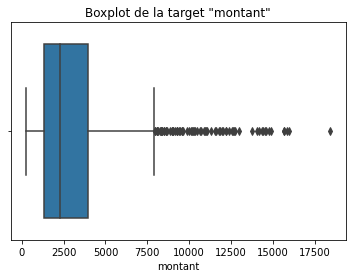

In [29]:
import scipy.stats as stats
sns.boxplot(y)
plt.title('Boxplot de la target "montant"')

In [30]:
y.describe()

count     1021.000000
mean      3250.088149
std       2830.788792
min        250.000000
25%       1352.000000
50%       2299.000000
75%       3966.000000
max      18424.000000
Name: montant, dtype: float64

Tout d'abord passons les variables explicatives numériques discretes à peu de modalités dans la "catégorie qualitatives" : 

In [31]:
qualitatives = ["annees_presence_logement", "nbre_emprunts_actuels", "compte_courant", "historique_credit","raison","compte_epargne","duree_emploi","autre_credit","logement","job","dependants","defaillant"]
quantitatives = ["duree_emprunt_mois",  "age",  "revenufinal"]

Observation de la répartition des variables explicatives qualitatives :

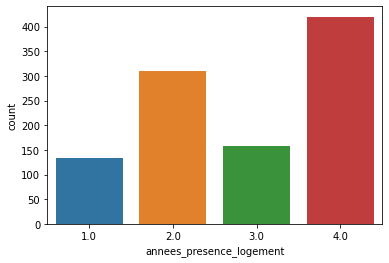

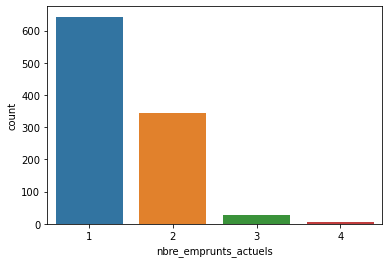

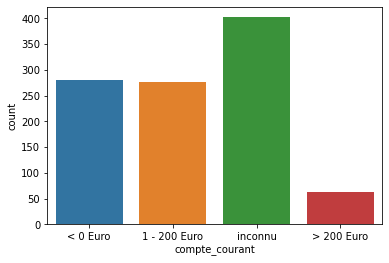

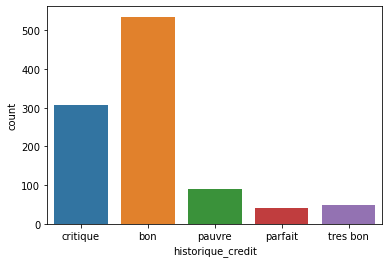

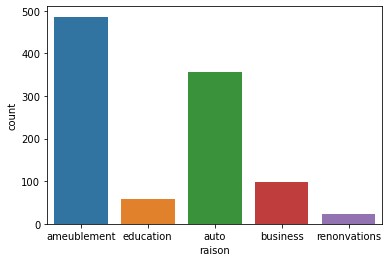

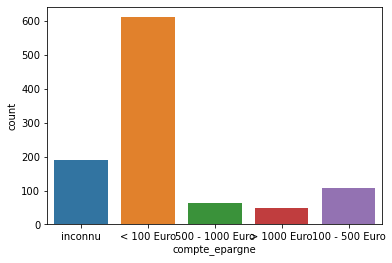

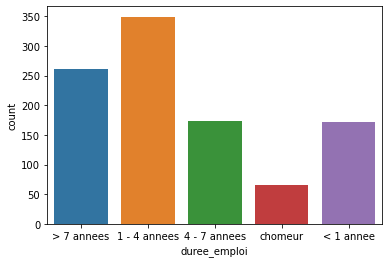

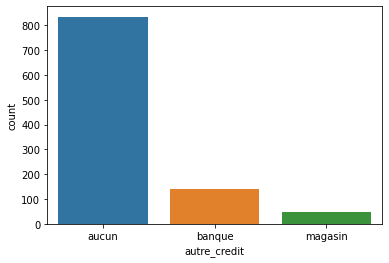

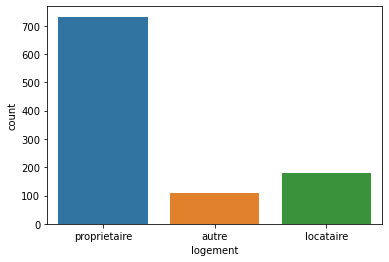

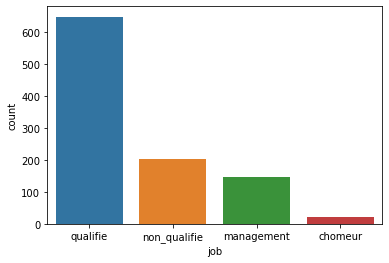

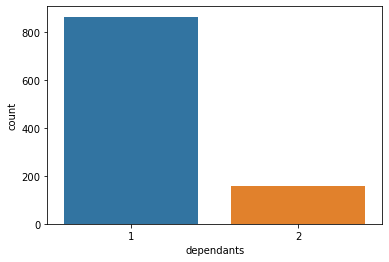

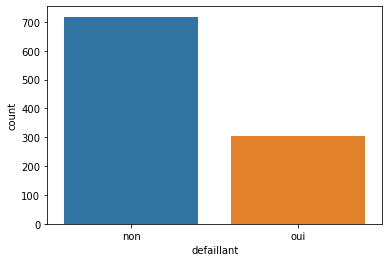

In [32]:
for i in qualitatives:
    sns.countplot(X[i])
    plt.show()

Au vu de ces histogrammes nous allons regrouper certaines modalités car trop peu fréquentes (seuil choisi < 3 % ):

In [33]:
X["nbre_emprunts_actuels"] = X["nbre_emprunts_actuels"].replace(4,3)

Pour les modalités "chomeur" et "renonvations" des variables "job" et "raison" respectivement, nous devons observer la répartition de la target avant un éventuel regroupement de modalités :

<AxesSubplot:xlabel='montant', ylabel='Density'>

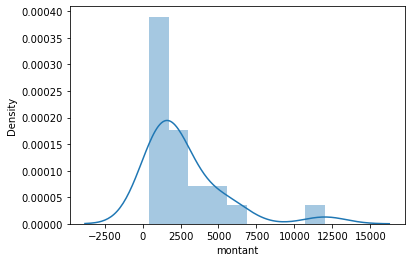

In [34]:
sns.distplot(y[X["raison"]=="renonvations"])

In [35]:
y[X["raison"]=="renonvations"].describe()

count       22.000000
mean      2728.090909
std       2627.490364
min        454.000000
25%       1214.500000
50%       1749.000000
75%       3203.250000
max      11998.000000
Name: montant, dtype: float64

<AxesSubplot:xlabel='montant', ylabel='Density'>

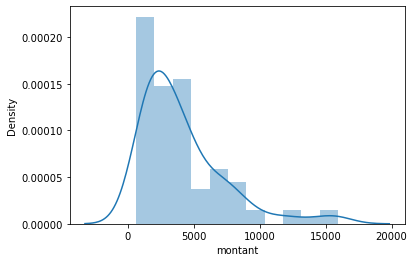

In [36]:
sns.distplot(y[X["raison"]=="business"])

In [37]:
y[X["raison"]=="business"].describe()

count       97.000000
mean      4112.721649
std       3224.354247
min        609.000000
25%       1908.000000
50%       3104.000000
75%       5117.000000
max      15945.000000
Name: montant, dtype: float64

Nous pouvons donc conclure, au vu de ces graphiques, qu'au sein de notre population, un credit pour renovation ou pour un business de manière générale aboutissent à des emprunts d'un montant relativement similaire. Nous allons donc pouvoir regrouper ces modalités.

In [38]:
X["raison"] = X["raison"].replace("renonvations","business")

Suivant la même démarche pour la variable "job" et sa modalité "chomeur", nous obtenons :

<AxesSubplot:xlabel='montant', ylabel='Density'>

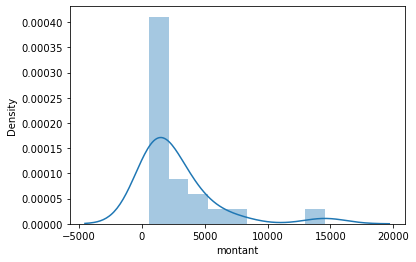

In [39]:
sns.distplot(y[X["job"]=="chomeur"])

In [40]:
y[X["job"]=="chomeur"].describe()

count       22.000000
mean      2745.136364
std       3168.669306
min        609.000000
25%       1117.250000
50%       1416.000000
75%       3541.000000
max      14555.000000
Name: montant, dtype: float64

<AxesSubplot:xlabel='montant', ylabel='Density'>

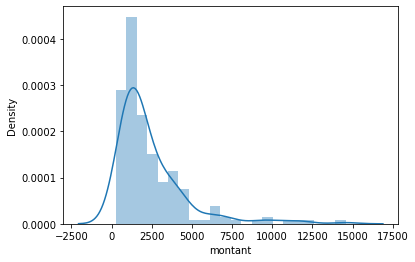

In [41]:
sns.distplot(y[X["job"]=="non_qualifie"])

In [42]:
y[X["job"]=="non_qualifie"].describe()

count      202.000000
mean      2412.841584
std       2227.034975
min        250.000000
25%       1126.750000
50%       1622.000000
75%       3042.000000
max      14576.000000
Name: montant, dtype: float64

Nous pouvons donc conclure, de façon encore plus favorable qu'avec la variable "raison" et sa modalité "renonvations", au regroupement de ces modalités.

In [43]:
X["job"] = X["job"].replace("chomeur","non_qualifie")
X["job"] = X["job"].replace("non_qualifie","non_qualifie_chomeur") 
# Puis on renomme la modalité pour ne pas gaspiller de l'information.

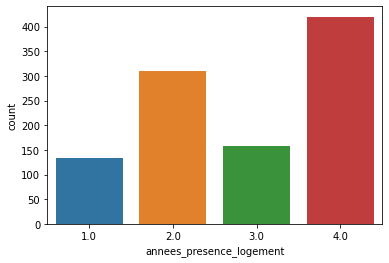

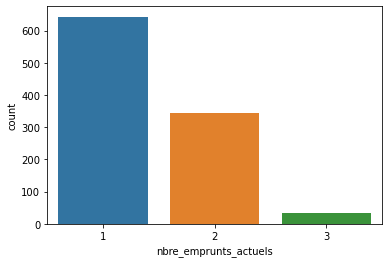

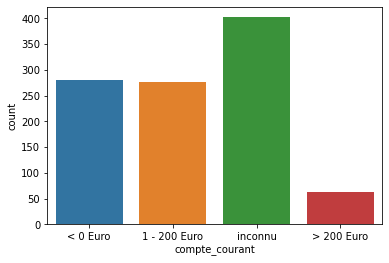

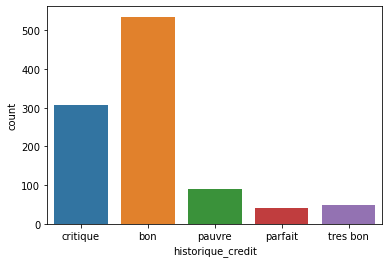

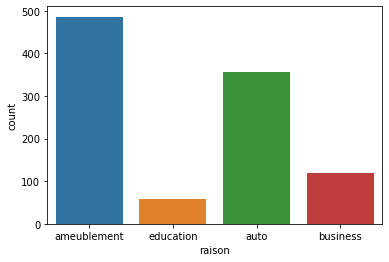

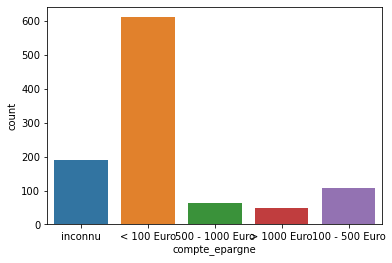

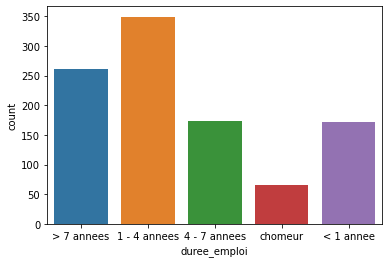

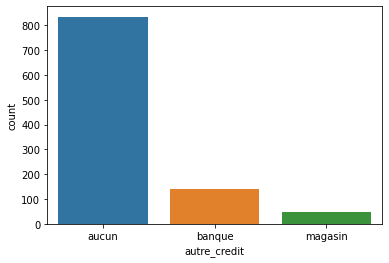

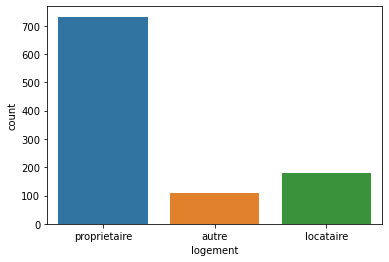

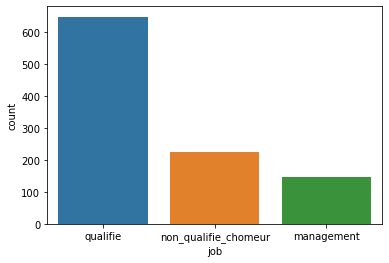

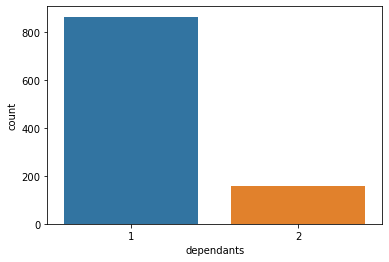

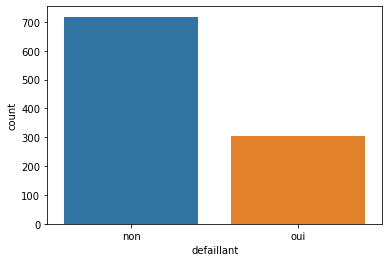

In [44]:
for i in qualitatives:
    sns.countplot(X[i])
    plt.show()

Observation de la distribution des variables explicatives quantitatives :

In [45]:
# fonction pour visualisation : histogramme, boxplot et QQplot
def visu_plots(df, variable):
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')    
    plt.show()

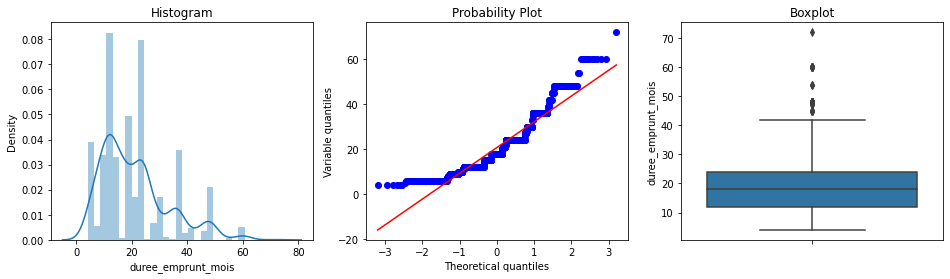

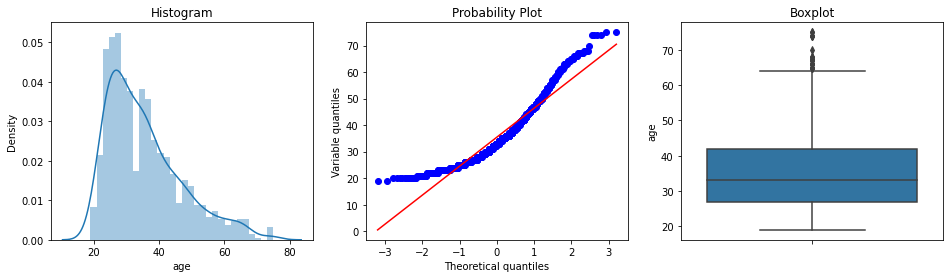

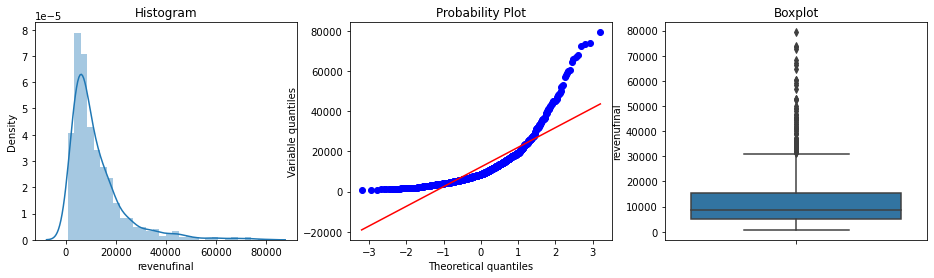

In [46]:
for i in quantitatives :
    visu_plots(X, i)

Aucun retraitement n'est nécéssaire suite à cette partie " distribution des variables explicatives quantitatives".

### Analyse bivariée

Pour rappel : 

In [47]:
print(quantitatives)

['duree_emprunt_mois', 'age', 'revenufinal']


In [48]:
print(qualitatives)

['annees_presence_logement', 'nbre_emprunts_actuels', 'compte_courant', 'historique_credit', 'raison', 'compte_epargne', 'duree_emploi', 'autre_credit', 'logement', 'job', 'dependants', 'defaillant']


Comportement des variables explicatives quantitatives par rapport à la target :

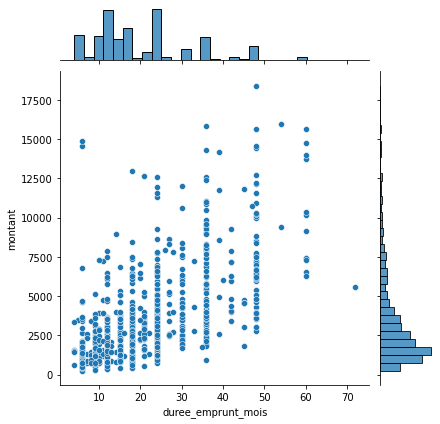

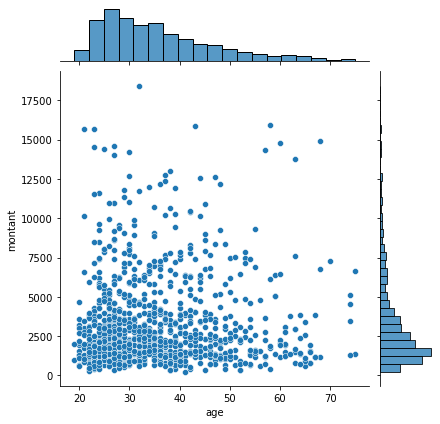

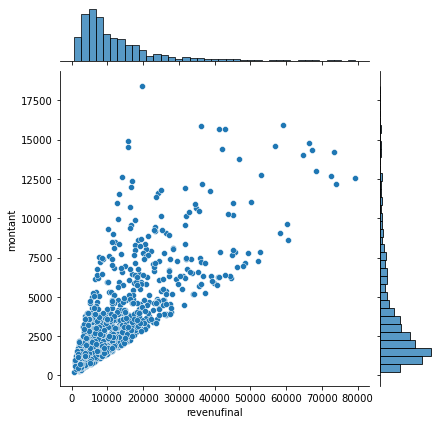

In [49]:
for i in quantitatives :
    sns.jointplot(data = X, x = X[i], y = y)
    plt.show

Comportement des variables explicatives qualitatives par rapport à la target :

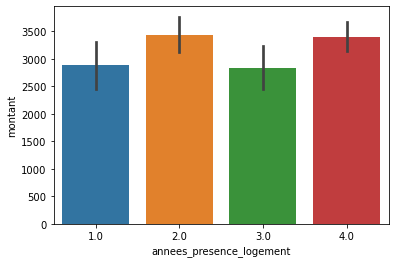

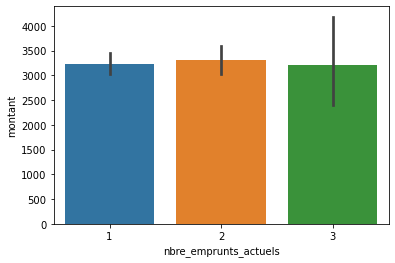

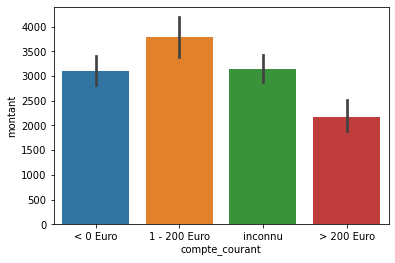

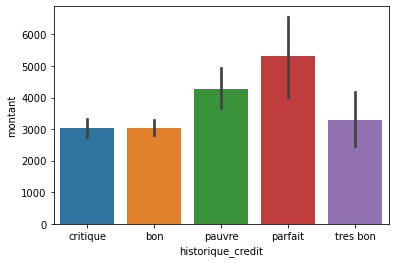

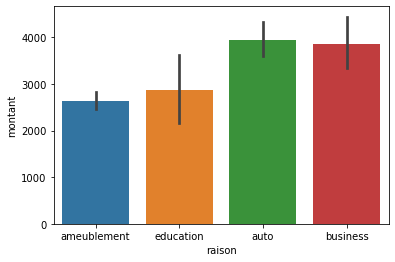

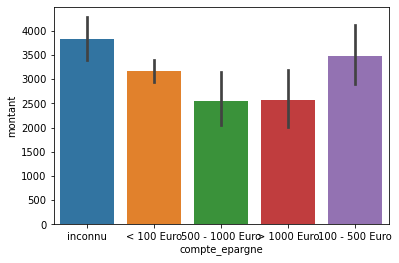

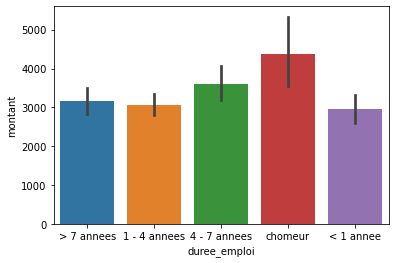

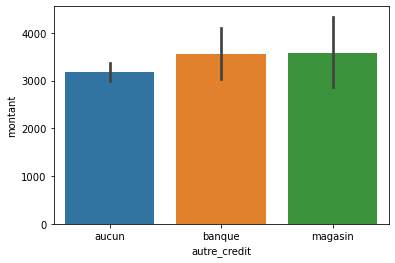

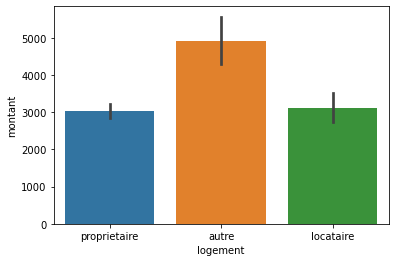

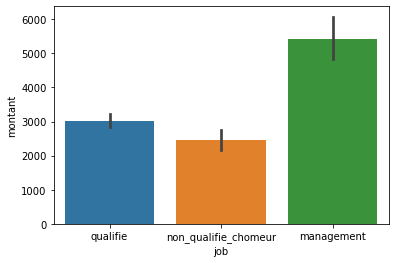

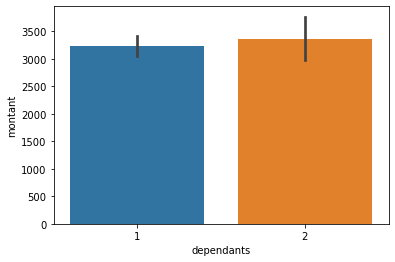

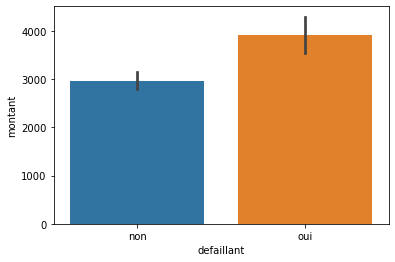

In [50]:
for i in qualitatives :
    sns.barplot(X[i], y)
    plt.show()

### Analyse de correlation

<AxesSubplot:>

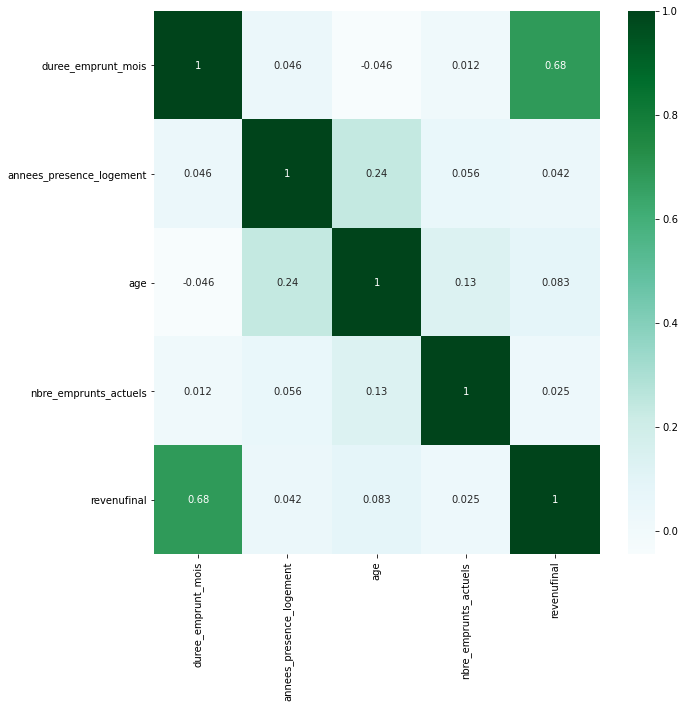

In [51]:
correlations = X.corr(method='spearman')  
#Nous preferons la corrélation au sens de Spearman car elle identifie les "corrélations monotones" (liens monotones entre les variables), en plus d'identifier les liens linéaires entre les variables.
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True,cmap='BuGn')

Cette sortie nous permet d'identifier une forte corrélation entre les variables "revenufinal" et "duree_emprunt_mois".

Etudions maintenant la corrélation de ces variables avec la target

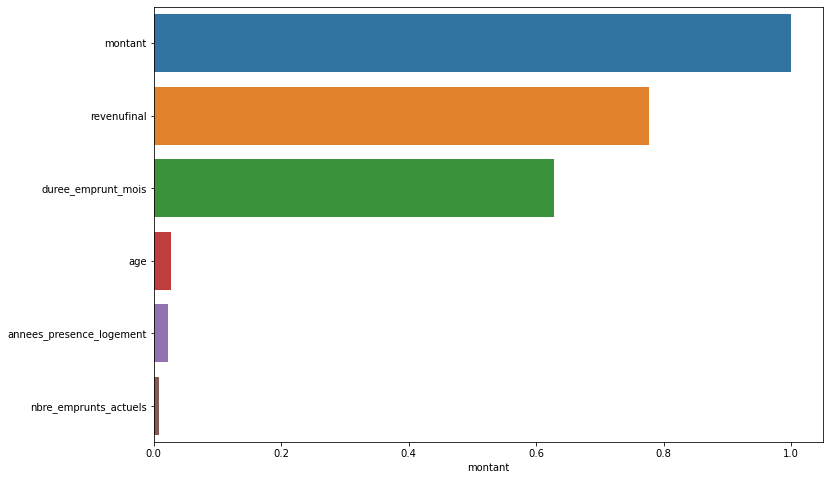

In [52]:
df_corr = abs(pd.concat([X,y],axis=1).corr(method='spearman'))
corrmontant = df_corr.sort_values('montant',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corrmontant['montant'], y=corrmontant.index)
plt.show()

Puis la relation entre "duree_emprunt_mois" et "revenufinal" : 

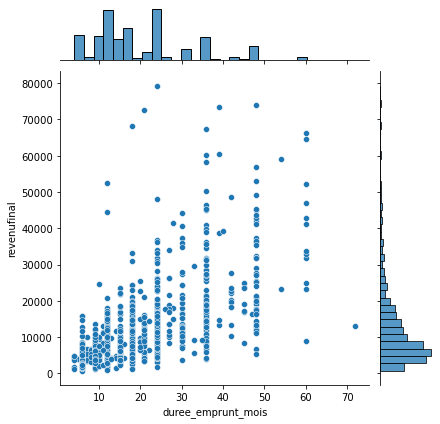

In [53]:
sns.jointplot(data = X, x = X["duree_emprunt_mois"], y = X["revenufinal"])

Au vu de ces précédentes analyses nous pouvons identifier une corrélation claire entre la variable "revenufinal" et "duree_emprunt_mois". Suivant cela, nous conserverons uniquement la variable "revenufinal" qui est la plus corrélée à la cible des deux. 

In [54]:
X = X.drop(["duree_emprunt_mois"], axis=1)

In [55]:
# Actualisation de la liste des variables quantitatives :
quantitatives.remove("duree_emprunt_mois")

## Préparation des données avant modélisation :

### Feature scaling

Afin de ne pas être confronté à des problèmes d'echelle lors de l'apprentissage nous allons implementer une procédure de remise à l'echelle de nos variable explicatives quantitatives :

In [56]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X[quantitatives])
X[quantitatives] = scaler.transform(X[quantitatives])

### Encodage des variables qualitatives et One Hot Encoding lorsque cela est nécessaire

Nous allons maintenant appliquer un one hot encoding aux variables qualitatives ne possédant pas de relation d'ordre entre les modalités afin que le modèle n'apprenne pas d'une quelconque relation d'ordre qui n'aurait pas lieu d'être :

In [57]:
for i in qualitatives:
    print(X[i].unique())

[4. 2. 3. 1.]
[2 1 3]
['< 0 Euro' '1 - 200 Euro' 'inconnu' '> 200 Euro']
['critique' 'bon' 'pauvre' 'parfait' 'tres bon']
['ameublement' 'education' 'auto' 'business']
['inconnu' '< 100 Euro' '500 - 1000 Euro' '> 1000 Euro' '100 - 500 Euro']
['> 7 annees' '1 - 4 annees' '4 - 7 annees' 'chomeur' '< 1 annee']
['aucun' 'banque' 'magasin']
['proprietaire' 'autre' 'locataire']
['qualifie' 'non_qualifie_chomeur' 'management']
['1' '2']
['non' 'oui']


Cela concerne donc les variables suivantes : 

In [58]:
qualitatives_to_one_hot = ["compte_courant", "raison", "compte_epargne","autre_credit","logement","job"]
df_one_hot = X[qualitatives_to_one_hot].copy()
df_one_hot = pd.get_dummies(df_one_hot)

In [59]:
X = X.drop(qualitatives_to_one_hot, axis=1)
X = pd.concat([X,df_one_hot],axis=1)

Ensuite, nous allons pouvoir encoder les variables qualitatives restantes en veillant à respecter l'ordre :

In [60]:
X[["annees_presence_logement","nbre_emprunts_actuels"]] = X[["annees_presence_logement","nbre_emprunts_actuels"]].astype('int')
X["historique_credit"] = X["historique_credit"].replace(['critique', 'bon', 'pauvre', 'parfait', 'tres bon'],[0,2,1,4,3])
X["duree_emploi"] = X["duree_emploi"].replace(['> 7 annees', '1 - 4 annees', '4 - 7 annees', 'chomeur', '< 1 annee'],[4,2,3,0,1])
X["dependants"] = X["dependants"].astype('int')
X["defaillant"] = X["defaillant"].replace(['non', 'oui'],[0,1])

## Modélisation :

In [61]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Découpage train/test set

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

### Régression linéaire classique 

In [63]:
# instance du modèle de régression linéaire
lr = linear_model.LinearRegression()

# entrainement sur le train data set
lr.fit(X_train,y_train)

# erreur mse sur le test data set comme base de comparaison
mse_test = mean_squared_error(y_test, lr.predict(X_test))
# sur le train data set 
mse_train = mean_squared_error(y_train, lr.predict(X_train))

print("MSE train : ", mse_train, "\nEt donc le RMSE train : ", np.sqrt(mse_train))
print("MSE test : ", mse_test, "\nEt donc le RMSE test : ", np.sqrt(mse_test))

MSE train :  3039851.9271708685 
Et donc le RMSE train :  1743.5171141032338
MSE test :  3159413.1791530945 
Et donc le RMSE test :  1777.4738195408377


In [64]:
print("Pour comparaison, la moyenne de la target 'montant' est : ", y.mean())

Pour comparaison, la moyenne de la target 'montant' est :  3250.088148873653


In [65]:
print("Le R2 train est de : ", r2_score(y_train, lr.predict(X_train)), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, lr.predict(X_test)))

Le R2 train est de :  0.6252795124002825 
Et le R2 de l'échantillon test est de :  0.5921592260896328


In [66]:
R2A_train = 1-(1-r2_score(y_train, lr.predict(X_train)))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
R2A_test = 1-(1-r2_score(y_test, lr.predict(X_test)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Le R2 ajusté train est de : ", R2A_train, "\nEt le R2 ajusté de l'échantillon test est de : ", R2A_test)

Le R2 ajusté train est de :  0.6088203401777473 
Et le R2 ajusté de l'échantillon test est de :  0.5478287071863319


Nous avons donc, pour l'instant, des résultats plutôt corrects avec un leger sur-apprentissage sur l'échantillon test identifié par le calcul du R2-ajusté train/test.

### Régression régularisée Ridge

Tout d'abord il nous faut determiner le coefficient de régularisation optimal. Nous utiliserons pour cela une validation croisée k-fold. Mais d'abord, regardons l'impact de l'évolution du choix de cet hyper-paramètre sur :

- L’évolution des poids attribués aux variables explicatives

- Le MSE

- Le R2

In [67]:
alphas = np.logspace(-5, 7, 300) # définition d'une plage de valeurs à tester

In [68]:
ridge = linear_model.Ridge()

coefs = []
errors = []
errorstrain = []
r2 = []
r2train = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    mse_test = mean_squared_error(y_test, ridge.predict(X_test))
    errors.append(mse_test)
    mse_train = mean_squared_error(y_train, ridge.predict(X_train))
    errorstrain.append(mse_train) 
    r2.append(r2_score(y_test, ridge.predict(X_test)))
    r2train.append(r2_score(y_train, ridge.predict(X_train)))

Affichage des poids de chaque variable explicative en fonction de alpha. Plus alpha augmente, plus les poids diminuent :

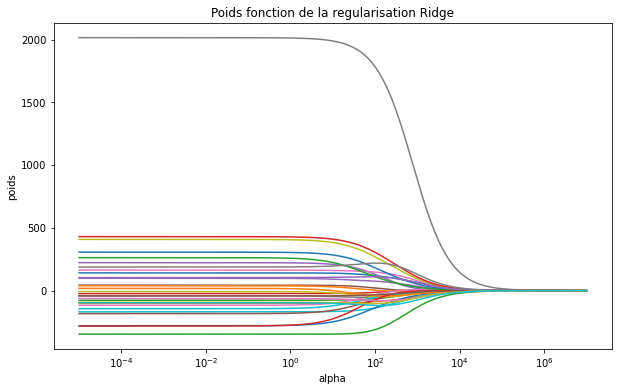

In [69]:
# affichage evolution de la valeur des poids 
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Poids fonction de la regularisation Ridge')
#plt.axis('tight')
plt.show()

Evolution de la MSE sur train/test :

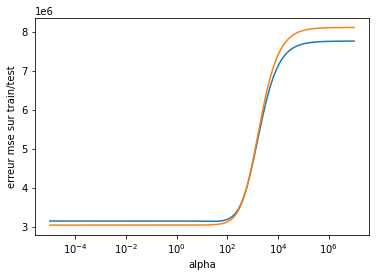

In [70]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.plot(alphas, errorstrain)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur mse sur train/test')
plt.axis('tight')
plt.show()

Evolution du R2 sur train/test : 

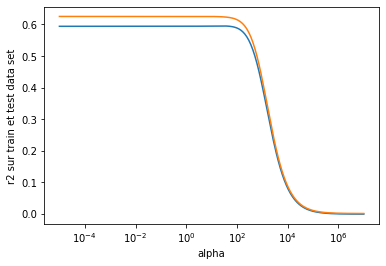

In [71]:
ax = plt.gca()

ax.plot(alphas, r2)
ax.plot(alphas, r2train)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 sur train et test data set')
plt.axis('tight')
plt.show()

#### Choix de l'hyper-paramètre par validation croisée 5-fold :

In [72]:
ridgecv = RidgeCV(alphas = alphas,cv=5)
ridgecv.fit(X_train, y_train)
best_alpha = ridgecv.alpha_
print("Le meilleur alpha par cross-validation est : ", best_alpha)

Le meilleur alpha par cross-validation est :  45.94173134636476


#### Entrainement du modèle avec ce choix de alpha :

In [73]:
ridge_final = Ridge(alpha = best_alpha)
ridge_final.fit(X_train, y_train)
mse_test = mean_squared_error(y_test, ridge_final.predict(X_test))
mse_train = mean_squared_error(y_train, ridge_final.predict(X_train))
print("MSE train : ", mse_train, "\nEt donc le RMSE train : ", np.sqrt(mse_train))
print("MSE test : ", mse_test, "\nEt donc le RMSE test : ", np.sqrt(mse_test))

MSE train :  3061398.3588779676 
Et donc le RMSE train :  1749.6852170827665
MSE test :  3140048.051152129 
Et donc le RMSE test :  1772.0180730320244


In [74]:
print("Pour comparaison, la moyenne de la target 'montant' est : ", y.mean())

Pour comparaison, la moyenne de la target 'montant' est :  3250.088148873653


In [75]:
print("Le R2 train est de : ", r2_score(y_train, ridge_final.predict(X_train)), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, ridge_final.predict(X_test)))

Le R2 train est de :  0.6226234983611934 
Et le R2 de l'échantillon test est de :  0.5946590222045885


In [76]:
R2A_train = 1-(1-r2_score(y_train, ridge_final.predict(X_train)))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
R2A_test = 1-(1-r2_score(y_test, ridge_final.predict(X_test)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Le R2 ajusté train est de : ", R2A_train, "\nEt le R2 ajusté de l'échantillon test est de : ", R2A_test)

Le R2 ajusté train est de :  0.6060476637357699 
Et le R2 ajusté de l'échantillon test est de :  0.5506002202703046


Nous obtenons quasiment les mêmes résultats que la régression simple plus haut. L'over-fitting s'est légèrement atténué grâce à la régularisation proposée par Ridge.

Pour information, voici les coefficients du modèle obtenu :

In [77]:
pd.Series(ridge_final.coef_, index = X.columns)

historique_credit           130.299225
duree_emploi                -92.854699
annees_presence_logement    -70.263092
age                         -18.640319
nbre_emprunts_actuels       170.523206
                               ...    
logement_locataire          -37.323944
logement_proprietaire       -73.164399
job_management              213.144860
job_non_qualifie_chomeur   -101.249241
job_qualifie               -111.895619
Length: 30, dtype: float64

## Lasso

Tout d'abord, il nous faut determiner la valeur optimale de l'hyper-paramètre. Nous utiliserons pour cela une validation croisée k-fold. Mais d'abord, regardons l'impact de l'évolution du choix de cet hyper-paramètre sur :

- L’évolution des poids attribués aux variables explicatives

- Le MSE

- Le R2

In [78]:
alphas = np.logspace(-5, 6, 300) # définition d'une plage de valeurs à tester

In [79]:
lasso = linear_model.Lasso()

coefs = []
errors = []
errorstrain = []
r2 = []
r2train = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    mse_test = mean_squared_error(y_test, lasso.predict(X_test))
    errors.append(mse_test)
    mse_train = mean_squared_error(y_train, lasso.predict(X_train))
    errorstrain.append(mse_train) 
    r2.append(r2_score(y_test, lasso.predict(X_test)))
    r2train.append(r2_score(y_train, lasso.predict(X_train)))

Affichage des poids de chaque variable explicative en fonction de alpha. Plus alpha augmente, plus les poids diminuent :

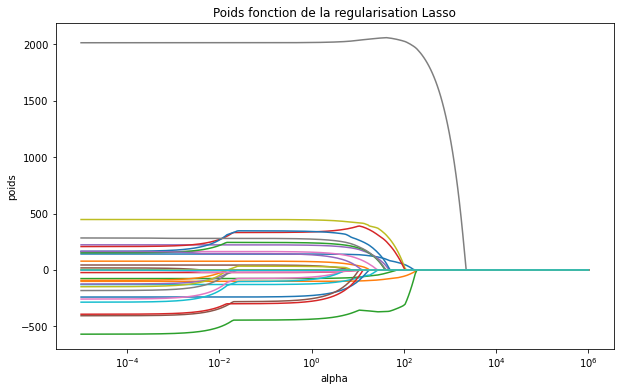

In [80]:
# affichage evolution de la valeur des poids 
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Poids fonction de la regularisation Lasso')
#plt.axis('tight')
plt.show()

Evolution de la MSE sur train/test :

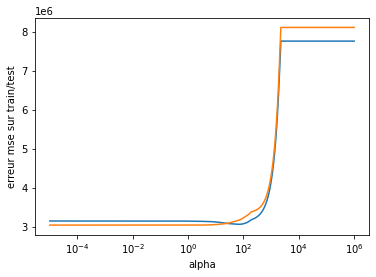

In [81]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.plot(alphas, errorstrain)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur mse sur train/test')
plt.axis('tight')
plt.show()

Evolution du R2 sur train/test : 

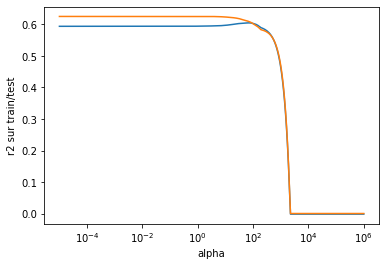

In [82]:
ax = plt.gca()

ax.plot(alphas, r2)
ax.plot(alphas, r2train)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 sur train/test')
plt.axis('tight')
plt.show()

#### Choix de l'hyper-paramètre par validation croisée 5-fold :

In [83]:
lassocv = LassoCV(alphas = alphas,random_state=42,cv=5)
lassocv.fit(X_train, y_train)
best_alpha = lassocv.alpha_
print("Le meilleur alpha par cross-validation est : ", best_alpha)

Le meilleur alpha par cross-validation est :  54.00593278542374


#### Entrainement du modèle avec ce choix de alpha :

In [84]:
lasso_final = Lasso(alpha = best_alpha)
lasso_final.fit(X_train, y_train)
mse_test = mean_squared_error(y_test, lasso_final.predict(X_test))
mse_train = mean_squared_error(y_train, lasso_final.predict(X_train))
print("MSE train : ", mse_train, "\nEt donc le RMSE train : ", np.sqrt(mse_train))
print("MSE test : ", mse_test, "\nEt donc le RMSE test : ", np.sqrt(mse_test))

MSE train :  3144180.4916763967 
Et donc le RMSE train :  1773.1837162788283
MSE test :  3063069.4583658203 
Et donc le RMSE test :  1750.1626948274895


In [85]:
print("Pour comparaison, la moyenne de la target 'montant' est : ", y.mean())

Pour comparaison, la moyenne de la target 'montant' est :  3250.088148873653


In [86]:
print("Le R2 train est de : ", r2_score(y_train, lasso_final.predict(X_train)), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, lasso_final.predict(X_test)))

Le R2 train est de :  0.612419000935017 
Et le R2 de l'échantillon test est de :  0.6045959969135801


In [87]:
R2A_train = 1-(1-r2_score(y_train, lasso_final.predict(X_train)))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
R2A_test = 1-(1-r2_score(y_test, lasso_final.predict(X_test)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Le R2 ajusté train est de : ", R2A_train, "\nEt le R2 ajusté de l'échantillon test est de : ", R2A_test)

Le R2 ajusté train est de :  0.5953949453391905 
Et le R2 ajusté de l'échantillon test est de :  0.5616173009259258


Nous obtenons quasiment les mêmes résultats que la régression simple et Ridge plus haut. L'over-fitting s'est légèrement atténué grâce à la "régularisation + sélection de variables" proposée par Lasso.

Pour information, voici les coefficients du modèle obtenu :

In [88]:
pd.Series(lasso_final.coef_, index = X.columns)

historique_credit           79.339647
duree_emploi               -74.800849
annees_presence_logement   -14.783462
age                         -0.000000
nbre_emprunts_actuels        0.000000
                              ...    
logement_locataire          -0.000000
logement_proprietaire       -0.000000
job_management               0.000000
job_non_qualifie_chomeur    -0.000000
job_qualifie                -0.000000
Length: 30, dtype: float64

Et les variables explicatives retirées du modèle par Lasso sont :

In [89]:
pd.Series(lasso_final.coef_[lasso_final.coef_ == 0], index = X.columns[lasso_final.coef_ == 0])

age                              -0.0
nbre_emprunts_actuels             0.0
dependants                        0.0
defaillant                        0.0
compte_courant_< 0 Euro          -0.0
compte_courant_> 200 Euro        -0.0
compte_courant_inconnu            0.0
raison_business                   0.0
raison_education                 -0.0
compte_epargne_100 - 500 Euro    -0.0
compte_epargne_500 - 1000 Euro   -0.0
compte_epargne_< 100 Euro        -0.0
compte_epargne_> 1000 Euro       -0.0
compte_epargne_inconnu            0.0
autre_credit_aucun               -0.0
autre_credit_banque               0.0
autre_credit_magasin             -0.0
logement_autre                    0.0
logement_locataire               -0.0
logement_proprietaire            -0.0
job_management                    0.0
job_non_qualifie_chomeur         -0.0
job_qualifie                     -0.0
dtype: float64

Feature importance au sens de Lasso :

Text(0.5, 1.0, 'Importance des Variables')

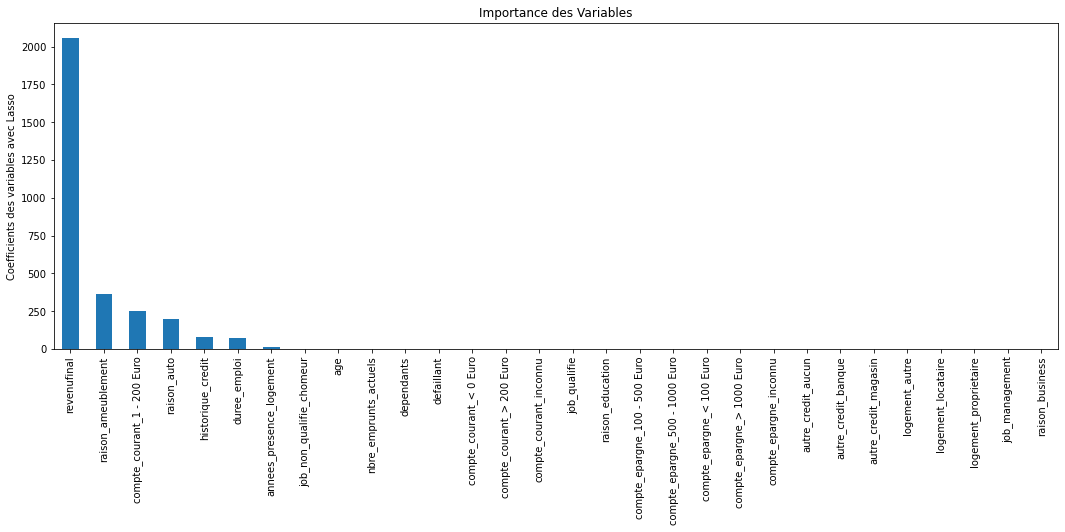

In [90]:
importance = pd.Series(np.abs(lasso_final.coef_.ravel()))
importance.index = X.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Coefficients des variables avec Lasso')
plt.title('Importance des Variables')

##  ElasticNet

Commençons par observer le R2 du modèle avec le choix par défaut des hyper-paramètres :

In [91]:
from sklearn.linear_model import ElasticNet

Elastic_Net = ElasticNet()
Elastic_Net.fit(X_train, y_train)

print("Le R2 train est de : ", r2_score(y_train, Elastic_Net.predict(X_train)), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, Elastic_Net.predict(X_test)))

Le R2 train est de :  0.5591614481515754 
Et le R2 de l'échantillon test est de :  0.5349144494211553


Ce qui est donc peu par rapport aux résultats observés précedemment. Penchons nous alors sur le choix des deux hyper-paramètres par validation croisée 5-fold :

In [92]:
# Pour information, ce bloc met un peu de temps à tourner (environ 5 minutes) : output = {'alpha': 5, 'l1_ratio': 0.99}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

Elastic_Net_final = ElasticNet()

cv = RepeatedKFold(n_splits=5, random_state=42)

# definition de la grille de recherche
grid = dict() 
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 80, 100]
grid['l1_ratio'] = np.arange(0, 1, 0.01)

# Recherche
search = GridSearchCV(Elastic_Net_final, grid, scoring='neg_mean_absolute_error', cv=cv)
results = search.fit(X_train, y_train)

print("Les meilleurs hyper-paramètres après cross-validation sont : ", results.best_params_)

Les meilleurs hyper-paramètres après cross-validation sont :  {'alpha': 5, 'l1_ratio': 0.99}


Entrainement du modèle avec ce choix d'hyper-paramètres : 

In [93]:
Elastic_Net_final = ElasticNet(alpha=5, l1_ratio=0.99)
Elastic_Net_final.fit(X_train, y_train)

print("Le R2 train est de : ", r2_score(y_train, Elastic_Net_final.predict(X_train)), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, Elastic_Net_final.predict(X_test)))

Le R2 train est de :  0.6227005451712975 
Et le R2 de l'échantillon test est de :  0.5961025972713497


In [94]:
R2A_train = 1-(1-r2_score(y_train, Elastic_Net_final.predict(X_train)))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
R2A_test = 1-(1-r2_score(y_test, Elastic_Net_final.predict(X_test)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Le R2 ajusté train est de : ", R2A_train, "\nEt le R2 ajusté de l'échantillon test est de : ", R2A_test)

Le R2 ajusté train est de :  0.6061280947395828 
Et le R2 ajusté de l'échantillon test est de :  0.5522007056704095


### Sélection des variables par récursivité

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import cross_val_score

Au vu du grpahique de la partie "Feature importance au sens de Lasso", nous allons selectionner 6 variables :

In [96]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [97]:
# variables retenus ou supprimés
variables_retenues = X.columns[rfe.support_]
variables_retenues

Index(['revenufinal', 'compte_courant_1 - 200 Euro', 'raison_ameublement',
       'raison_education', 'autre_credit_banque', 'job_management'],
      dtype='object')

Il est intéressant de remarquer que le choix des variables retenues n'est pas exactement le même que celui de la selection de variables induite par Lasso.

In [98]:
#Entrainement du modèle avec ces variables et performance : 

lr_final = linear_model.LinearRegression()
lr_final.fit(X_train[variables_retenues],y_train)

print("Le R2 train est de : ", r2_score(y_train, lr_final.predict(X_train[variables_retenues])), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, lr_final.predict(X_test[variables_retenues])))

Le R2 train est de :  0.6150356516873953 
Et le R2 de l'échantillon test est de :  0.5926662819975144


In [99]:
mse_test = mean_squared_error(y_test, lr_final.predict(X_test[variables_retenues]))
mse_train = mean_squared_error(y_train, lr_final.predict(X_train[variables_retenues]))

print("MSE train : ", mse_train, "\nEt donc le RMSE train : ", np.sqrt(mse_train))
print("MSE test : ", mse_test, "\nEt donc le RMSE test : ", np.sqrt(mse_test))

MSE train :  3122953.387486548 
Et donc le RMSE train :  1767.1879887229168
MSE test :  3155485.1777848927 
Et donc le RMSE test :  1776.3685365894355


In [100]:
print("Pour comparaison, la moyenne de la target 'montant' est : ", y.mean())

Pour comparaison, la moyenne de la target 'montant' est :  3250.088148873653


In [101]:
R2A_train = 1-(1-r2_score(y_train, lr_final.predict(X_train[variables_retenues])))*(len(y_train)-1)/(len(y_train)-X_train[variables_retenues].shape[1]-1)
R2A_test = 1-(1-r2_score(y_test, lr_final.predict(X_test[variables_retenues])))*(len(y_test)-1)/(len(y_test)-X_test[variables_retenues].shape[1]-1)
print("Le R2 ajusté train est de : ", R2A_train, "\nEt le R2 ajusté de l'échantillon test est de : ", R2A_test)

Le R2 ajusté train est de :  0.611768627515011 
Et le R2 ajusté de l'échantillon test est de :  0.5845196076374646


Qui est donc, de loin, le modèle le plus performant que nous avons obtenu. Tant d'un point de vue performance que d'un point de vue généralisation (c'est le modèle qui sur-apprend le moins des 5). Nous conserverons donc ce dernier.

#### Analyse complémentaire

Il est possible d'observer l'évolution de la performance du modèle au cours de cette procédure de sélection :

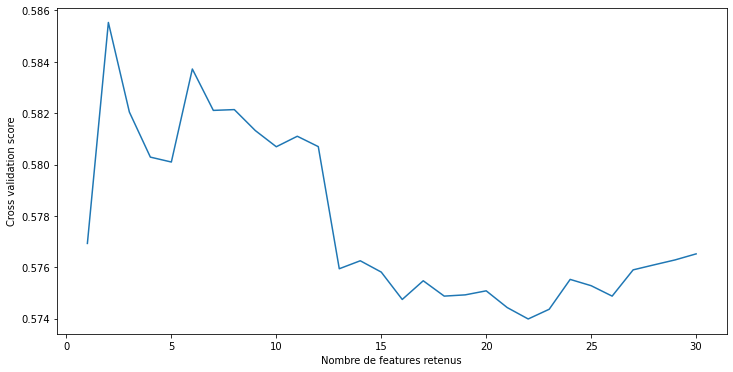

In [102]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LinearRegression())
model = LinearRegression()
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)

pipeline.fit(X_train,y_train)


# visu du score en fonction du nbre de features retenus 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Nombre de features retenus")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [103]:
print("Nous remarquons que le nombre de variables explicatives optimal peut encore être diminué pour atteindre ", rfecv.n_features_) 

Nous remarquons que le nombre de variables explicatives optimal peut encore être diminué pour atteindre  2


In [104]:
print("Ces variables sont : ", X.columns[rfecv.support_])

Ces variables sont :  Index(['revenufinal', 'raison_ameublement'], dtype='object')


In [105]:
variables_retenues = ['revenufinal', 'raison_ameublement']

lr_rfecv = linear_model.LinearRegression()
lr_rfecv.fit(X_train[variables_retenues],y_train)

print("Le R2 train est de : ", r2_score(y_train, lr_rfecv.predict(X_train[variables_retenues])), "\nEt le R2 de l'échantillon test est de : ", r2_score(y_test, lr_rfecv.predict(X_test[variables_retenues])))

Le R2 train est de :  0.6031757065537205 
Et le R2 de l'échantillon test est de :  0.5993821879262057


In [106]:
mse_test = mean_squared_error(y_test, lr_rfecv.predict(X_test[variables_retenues]))
mse_train = mean_squared_error(y_train, lr_rfecv.predict(X_train[variables_retenues]))

print("MSE train : ", mse_train, "\nEt donc le RMSE train : ", np.sqrt(mse_train))
print("MSE test : ", mse_test, "\nEt donc le RMSE test : ", np.sqrt(mse_test))

MSE train :  3219165.0392744634 
Et donc le RMSE train :  1794.2031766983537
MSE test :  3103459.183675429 
Et donc le RMSE test :  1761.6637544308587


In [107]:
print("Pour comparaison, la moyenne de la target 'montant' est : ", y.mean())

Pour comparaison, la moyenne de la target 'montant' est :  3250.088148873653


In [108]:
R2A_train = 1-(1-r2_score(y_train, lr_rfecv.predict(X_train[variables_retenues])))*(len(y_train)-1)/(len(y_train)-X_train[variables_retenues].shape[1]-1)
R2A_test = 1-(1-r2_score(y_test, lr_rfecv.predict(X_test[variables_retenues])))*(len(y_test)-1)/(len(y_test)-X_test[variables_retenues].shape[1]-1)
print("Le R2 ajusté train est de : ", R2A_train, "\nEt le R2 ajusté de l'échantillon test est de : ", R2A_test)

Le R2 ajusté train est de :  0.602059463815475 
Et le R2 ajusté de l'échantillon test est de :  0.5967465444257203


Qui aboutit à un modèle avec un meilleur pouvoir de généralisation que le précédent mais dont les performances sur l'échantillon d'apprentissage sont moindres.

## Validation du modèle de régression :

Nous ferrons cette étude avec le modèle "lr_final" obtenu après selection de variables par récursivité :

In [109]:
variables_retenues  = X.columns[rfe.support_]

- Les erreurs sont centrés

In [110]:
erreurs = y_test - lr_final.predict(X_test[variables_retenues])

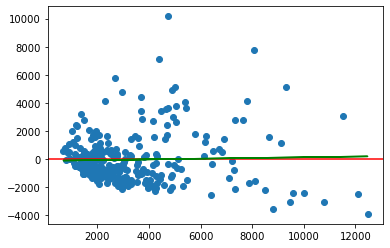

In [111]:
plt.scatter(lr_final.predict(X_test[variables_retenues]), erreurs)
plt.axhline(y=0, color='r', linestyle='-')

x_plot = lr_final.predict(X_test[variables_retenues])
y_plot = erreurs
slope, intercept = np.polyfit(x_plot, y_plot, 1)
plt.plot(x_plot, slope*x_plot + intercept, color='g')

plt.show()

In [112]:
print("La moyenne des erreurs est : ", np.mean(erreurs))

La moyenne des erreurs est :  -30.345667177277026


Les erreurs sont donc relativement centrées.

- Les erreurs sont non corrélées

Pour cela nous allons utiliser le test de Durbin Watson :

In [113]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(erreurs)

1.9405430866252802

Les erreurs sont donc non corrélées puisque la statistique de Durbin-Watson est proche de 2 (relativement à une échelle de variation de cette dernière entre 0 et 4)

- Les erreurs sont de variance constante

Pour cela nous utiliserons le test de Breusch-Pagan de la librairie statsmodels.

In [114]:
X = X.rename(columns={"compte_courant_1 - 200 Euro": "compte_courant_1_200_Euro"}) 
variables_retenues = list(variables_retenues)
variables_retenues.remove("compte_courant_1 - 200 Euro")
variables_retenues.append("compte_courant_1_200_Euro")
#afin d'avoir un format compatible à ce que demande la librairie

In [115]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value']

fit = smf.ols('montant ~ revenufinal + compte_courant_1_200_Euro + raison_ameublement + raison_education + autre_credit_banque + job_management', data=pd.concat([X[variables_retenues],y], axis = 1)).fit()
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 74.15760521828157),
 ('p-value', 5.721588419998139e-14)]

Ainsi, nous rejetons l'hypothèse d'homoscédasticité.

- Les erreurs sont gaussiennes

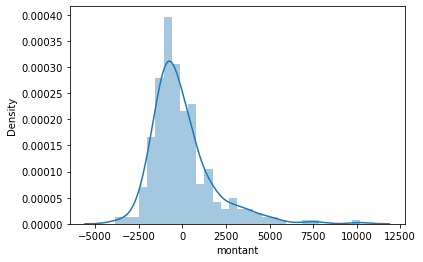

In [116]:
sns.distplot(erreurs)
plt.show()

A première vue ça n'a pas l'air d'être le cas, confirmons cela avec le test de Shapiro :

In [117]:
from scipy.stats import shapiro
shapiro(erreurs)

ShapiroResult(statistic=0.8690114617347717, pvalue=1.7628230528481397e-15)

Le test de Shapiro rejette clairement l'hypothèse de normalité des résidus. Nous pouvons obtenir une illustration de cela au travers de la sortie ci-dessous : 

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

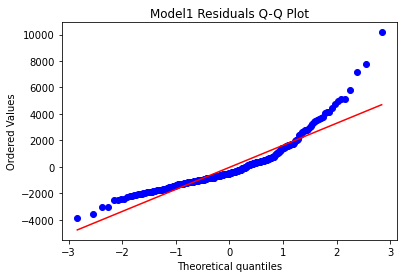

In [118]:
stats.probplot(erreurs, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

## Conclusion

Nos données ne sont pas adaptées à une modélisation de type "Regression linéaire" au vu de la partie "Validation du modèle" (les deux derniers postulats ne sont pas vérifiés). Ceci explique les performances limitées de notre modèle final. Pour résoudre cela il est possible de : 

- Ajouter de nouvelles variables explicatives au modèle

- Tester des croisements entre les variables explicatives

- Appliquer des transformations aux varibles explicatives / à la target afin de créer une relation linéaire.

- Réfléchir à une approche non linéaire (exemple : Random Forest par exemple)

Ces 4 points seraient à explorer pour une approche "complète". Cependant, ils sortent du cadre de ce projet et de ce qui est attendu, c'est pourquoi nous les laisseront à l'état de points ouverts. Au vu de leur importance il est nécéssaire de les citer ici afin de les garder à l'esprit. 

Ceci conclut ce travail. Je vous remercie de l'attention portée à ce dernier.